## Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# RF
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb


In [2]:
training = pd.read_csv('../test/training-person2.csv').fillna(0)
test = pd.read_csv('../test/test-person2.csv').fillna(0)
sumbit = test['person'].to_frame()

In [3]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.1

In [4]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [16]:
rdf = RandomForestClassifier(
    min_samples_split=4,
    criterion = 'entropy',
    random_state=RANDOM_SEED,
    n_estimators=200
)

In [17]:
# Training
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [18]:
# Predict value
ret = rdf.predict_proba(X_test)

In [19]:
y_test_predictd = rdf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.8387858960378044

In [20]:
rdf.score(X_test, y_test)

0.9438722966014418

In [21]:
# Predict value kaggle set
# Training
#rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [22]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

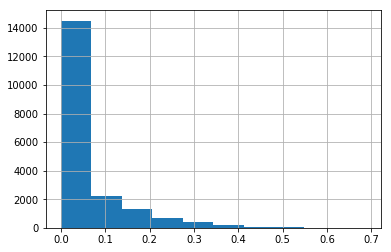

In [23]:
g = (sumbit['label']).hist()

In [24]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: checkout days        Importance: 0.0778577
Variable: checkout             Importance: 0.0725292
Variable: device_type_categ    Importance: 0.0465232
Variable: first_event_days     Importance: 0.0398091
Variable: top_event_categ      Importance: 0.0392699
Variable: model_brand_views_categ Importance: 0.0371432
Variable: color_model_categ    Importance: 0.036652
Variable: city_categ           Importance: 0.0365337
Variable: brand_categ          Importance: 0.0364253
Variable: event                Importance: 0.036336
Variable: top_condition_categ  Importance: 0.0354561
Variable: region_categ         Importance: 0.0348273
Variable: country_categ        Importance: 0.0337396
Variable: viewed product       Importance: 0.0324939
Variable: events_cout_last_week Importance: 0.0309048
Variable: events_mean_frec_last_week Importance: 0.0300578
Variable: viewed product days  Importance: 0.0252788
Variable: last_event_days      Importance: 0.0227524
Variable: brand listing        Importa

In [25]:
sumbit.to_csv('test/sumbit-2.csv', index=False)

In [26]:
import gc
gc.collect()

2925